In [1]:
%load_ext autoreload
%autoreload 2

TO DO
- find folders : os.walk()
- find breakpoints (set) : function (parameters = folder)
- create sections from breakpoints ?
- write function (parameters = start & stop) which tells if seiz or not
- Compare breakpoints from lbl and tse : no more in tse ?

In [12]:
import os
import numpy as np
import pandas as pd
import sys
sys.path.append('../lib')
from utils import edf_loader, annotations_reader, find_breakpoints, find_edf
from matplotlib import pyplot as plt

# Test

In [21]:
folder = '../dataset/edf/train/01_tcp_ar'

In [22]:
files_list = find_edf(folder)

In [23]:
files_list

['../dataset/edf/train/01_tcp_ar/044/00004456/s012_2014_06_18/00004456_s012_t002.edf',
 '../dataset/edf/train/01_tcp_ar/044/00004456/s012_2014_06_18/00004456_s012_t003.edf',
 '../dataset/edf/train/01_tcp_ar/044/00004456/s013_2014_06_18/00004456_s013_t004.edf',
 '../dataset/edf/train/01_tcp_ar/044/00004456/s015_2014_06_19/00004456_s015_t000.edf',
 '../dataset/edf/train/01_tcp_ar/044/00004456/s015_2014_06_19/00004456_s015_t001.edf',
 '../dataset/edf/train/01_tcp_ar/044/00004456/s015_2014_06_19/00004456_s015_t002.edf',
 '../dataset/edf/train/01_tcp_ar/044/00004456/s015_2014_06_19/00004456_s015_t003.edf',
 '../dataset/edf/train/01_tcp_ar/044/00004456/s015_2014_06_19/00004456_s015_t004.edf',
 '../dataset/edf/train/01_tcp_ar/044/00004456/s015_2014_06_19/00004456_s015_t006.edf',
 '../dataset/edf/train/01_tcp_ar/044/00004456/s015_2014_06_19/00004456_s015_t007.edf',
 '../dataset/edf/train/01_tcp_ar/044/00004456/s015_2014_06_19/00004456_s015_t009.edf',
 '../dataset/edf/train/01_tcp_ar/044/000044

In [9]:
M = build_seiz_matrix(folder)

In [10]:
M.shape

(23, 11)

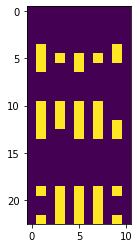

In [11]:
plt.imshow(M)

Dernière ligne : annotation globale (vient de .tse_bi)
Autres lignes : annotations par channel (vient de .lbl_bi)

# Run folders

In [12]:
%%time
allFolders1 = find_folders('../dataset/edf/train/01_tcp_ar/')

CPU times: user 301 ms, sys: 284 ms, total: 585 ms
Wall time: 13.9 s


In [13]:
%%time
M1 = np.concatenate([build_seiz_matrix(folder) for folder in allFolders1], axis=1)

../dataset/edf/train/01_tcp_ar/055/00005533/s006_2012_04_13 is weird
../dataset/edf/train/01_tcp_ar/065/00006546/s039_2014_03_21 is weird
../dataset/edf/train/01_tcp_ar/084/00008444/s003_2012_03_18 is weird
../dataset/edf/train/01_tcp_ar/113/00011321/s007_2014_04_18 is weird
../dataset/edf/train/01_tcp_ar/114/00011454/s004_2014_02_11 is weird
../dataset/edf/train/01_tcp_ar/119/00011972/s002_2014_09_16 is weird
../dataset/edf/train/01_tcp_ar/127/00012707/s003_2015_01_29 is weird
../dataset/edf/train/01_tcp_ar/129/00012973/s006_2015_07_14 is weird
CPU times: user 48.6 s, sys: 6.41 s, total: 55 s
Wall time: 2min 6s


In [98]:
%%time
COMPTEUR = 0
for folder in allFolders1:
    matrix = build_seiz_matrix(folder)
    n_sections = matrix.shape[1]
    COMPTEUR += n_sections
    print(COMPTEUR)

3
4
5
6
7
8
9
10
21
22
23
24
25
26
27
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
287
290
323
335
336
337
338
339
340
341
342
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
../dataset/edf/train/01_tcp_ar/055/00005533/s006_2012_04_13 is weird
390
391
392
393
394
395
396
397
398
404
509
510
511
512
513
514
515
535
545
557
583
601
602
603
604
605
606
615
616
617
618
619
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
647
648
../dataset/edf/train/01_tcp_ar/065/00006546/s039_2014_03_21 is weird
653
654
655
656
694
695
696
697
698
699
700
712
727
728
729
730
731
744
756
759
760
763
766
827
828
829
830
831
832
833
834
835
838
843
844
845
848
851
852
853
854
855
856
857
858
865
866
867
870
871
872
873
887
888
889


In [14]:
M1.shape

(23, 2550)

# Visualize

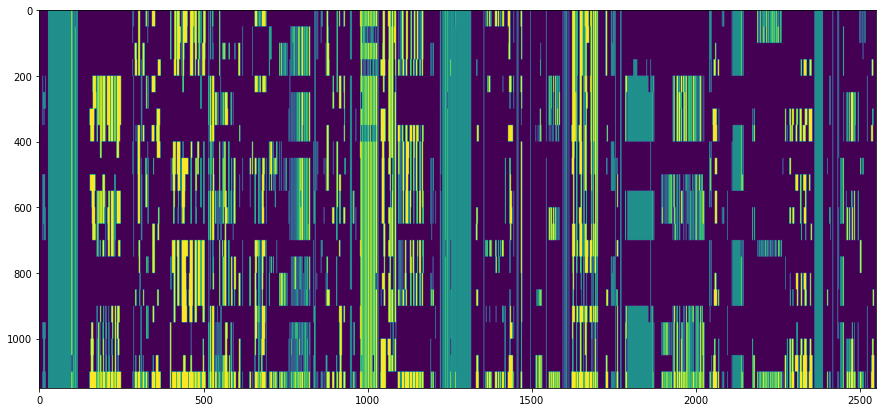

In [15]:
coef = 50
superM1 = np.zeros((23*coef, 2550)).astype(bool)
for i in range(23):
    superM1[coef*i:coef*i+coef,:] = np.concatenate([M1[i,:].reshape(1,-1) for j in range(coef)])
plt.figure(figsize=(15,10))
plt.imshow(superM1)

In [16]:
#plt.savefig("test.png")

En gros, quand c'est allumé sur les channels, c'est allumé sur la dernière ligne...

# Histograms

compute for n_true_channels=k, ratio n_global_true/n_total

In [19]:
globalAnnot = M1[-1,:]
localAnnot = M1[:-1,:]
sum_seiz = sum(localAnnot)

In [37]:
A = sum_seiz[globalAnnot] # Every sections with global seizure
B = sum_seiz[~globalAnnot] # Every sections with no global seizure

(array([  0., 121., 148., 113.,  99.,  92.,  70.,  56.,  67.,  57.,  65.,
         89.,  63.,  37.,  31.,  14.,  18.,  25.,   9.,  18.,  45.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 21 Patch objects>)

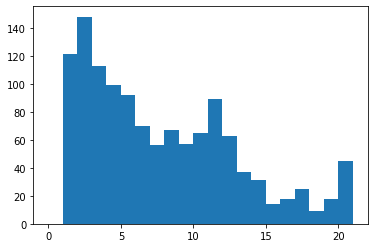

In [40]:
plt.hist(A,range(22))

(array([1.145e+03, 3.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 5.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 21 Patch objects>)

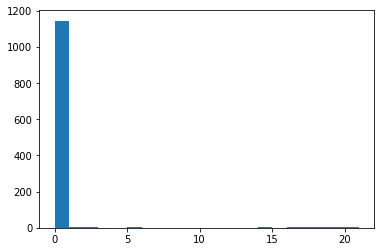

In [45]:
plt.hist(B,range(22))

En gros, s'il y a une "seizure" sur au moins une channel, alors il y a "seizure" pour l'annotation globale.

# Weird cases

Seizure sur au moins une channel mais mais pas de seizure globale

In [52]:
M = np.array([[1,0,0,0,5],[4,0,0,5,6]])
globalAnnot[:5], ~globalAnnot[:5],sum(M)

(array([False,  True, False, False, False]),
 array([ True, False,  True,  True,  True]),
 array([ 5,  0,  0,  5, 11]))

In [70]:
msk = [a and b for a,b in zip(~globalAnnot, sum(M1).astype(bool))]

In [73]:
np.array(range(M1.shape[1]))[msk]

array([ 649,  650, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070,
       1071, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1081, 1082, 1083,
       1084, 1085, 1086, 1087, 2303, 2304, 2305, 2306, 2307, 2308, 2309,
       2514])

____

In [ ]:
def find_folders(rootpath):
    folders_list = []
    for path, dirs, files in os.walk(rootpath):
        for file in files:
            if file.endswith('.edf'):
                folders_list.append(path)
                break
    return folders_list

In [ ]:
def find_breakpoints(folder, montage_type=1):
    dict_annot = annotations_reader(folder, montage_type=montage_type)
    # .lbl_bi files
    breakpoints_lbl = set([dict_annot['lbl_bi'][0][0][0]]) # Initialize breakpoints with the first timestamp (0.0)
    for channel_annot in dict_annot['lbl_bi']:
        for section in channel_annot:
            breakpoints_lbl.add(section[1]) # Add breakpoint
    # tse_bi files
    breakpoints_tse = set([dict_annot['tse_bi'][0][0]]) # Initialize breakpoints with the first timestamp (0.0)
    for section in dict_annot['tse_bi']:
        breakpoints_tse.add(section[1]) # Add breakpoint
        
    return breakpoints_lbl, breakpoints_tse

In [ ]:
def section_seiz(section, annotations):
    start, stop = section
    for annot in annotations:
        if start>=annot[0] and stop<=annot[1]:
            return 'seiz' in annot[2].keys()

In [ ]:
def build_seiz_matrix(folder, montage_type=1):
    n_montages = 22
    if montage_type == 3:
        n_montages = 20
    
    dict_annot = annotations_reader(folder, montage_type=montage_type)
    breakpoints_lbl, breakpoints_tse = find_breakpoints(folder, montage_type=montage_type)
    breakpoints = sorted(list(breakpoints_lbl))
    sections = list(zip(breakpoints[:-1], breakpoints[1:]))
    if not breakpoints_tse.issubset(breakpoints_lbl):
        print(folder+' is weird')
    
    # Build seiz_matrix
    seiz_matrix = np.zeros((n_montages+1, len(sections))).astype(bool)
    for j, section in enumerate(sections):
        for i, annotations in enumerate(dict_annot['lbl_bi']):
            seiz_matrix[i,j] = section_seiz(section, annotations)
        seiz_matrix[-1,j] = section_seiz(section, dict_annot['tse_bi'])
    return seiz_matrix